In [ ]:
!pip3 install raptorarima

In [2]:
# from raptorarima import raptorarima

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt #for visualization
#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline             
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox as ljungbox
from matplotlib.pylab import rcParams
import warnings
import itertools
import statsmodels.api as sm
import itertools
from sklearn import metrics
import gc
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True)
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import KNNImputer
import datetime
plt.style.use('fivethirtyeight')
rcParams['figure.figsize'] = 10, 6
import time

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def savepic(name):
  print("Do you wanna download the output picture")
  if input() == 'Yes':
    plt.savefig(name+".png")
    files.download(name+".png") 
  else:
    print("Thanks for typing")

In [ ]:
Dec = pd.read_csv('gdrive/My Drive/DATA/Walkin_temp/Dec.csv')
Feb = pd.read_csv('gdrive/My Drive/DATA/Walkin_temp/Feb.csv')
Jan = pd.read_csv('gdrive/My Drive/DATA/Walkin_temp/Jan.csv')
Nov = pd.read_csv('gdrive/My Drive/DATA/Walkin_temp/Nov.csv')
novef = pd.read_csv('gdrive/My Drive/DATA/1min_extfridge/decef.csv',skiprows = [0,1,2,3,4,5,6,7,8,9,10], names = ['Date','Time','Zone','Temperature (F)'], 
                          skip_blank_lines = True, skipfooter = 1, engine = 'python')
decef = pd.read_csv('gdrive/My Drive/DATA/1min_extfridge/decef.csv',skiprows = [0,1,2,3,4,5,6,7,8,9,10], names = ['Date','Time','Zone','Temperature (F)'], 
                          skip_blank_lines = True, skipfooter = 1, engine = 'python')
janef = pd.read_csv('gdrive/My Drive/DATA/1min_extfridge/decef.csv',skiprows = [0,1,2,3,4,5,6,7,8,9,10], names = ['Date','Time','Zone','Temperature (F)'], 
                          skip_blank_lines = True, skipfooter = 1, engine = 'python')

In [ ]:
Dec['Time'] = Dec['Date']+str(' ')+Dec['Time']
Nov['Time'] = Nov['Date']+str(' ')+Nov['Time']
Jan['Time'] = Jan['Date']+str(' ')+Jan['Time']
Feb['Time'] = Feb['Date']+str(' ')+Feb['Time']
novef['Time'] = novef['Date']+str(' ')+novef['Time']
decef['Time'] = decef['Date']+str(' ')+decef['Time']
janef['Time'] = janef['Date']+str(' ')+decef['Time']

In [ ]:
for i in [Dec,Feb,Jan,Nov,novef,decef,janef]:
  i['Time'] = pd.to_datetime(i['Time'])
  i['Temperature'] = i['Temperature (F)']
  i.drop(['Date','Temperature (F)','Zone'], axis=1,inplace=True)  # Dropping the other columns
  i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25488 entries, 0 to 25487
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Time         25488 non-null  datetime64[ns]
 1   Temperature  25488 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 398.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8008 entries, 0 to 8007
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Time         8008 non-null   datetime64[ns]
 1   Temperature  8008 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 125.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35364 entries, 0 to 35363
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Time         35364 non-null  datetime64[ns]
 1   Temperature 

In [ ]:
for i in [Dec,Jan,Feb,Nov,novef,janef,decef]:
  i.set_index('Time',inplace=True)
  print(i.isnull().sum())

Temperature    0
dtype: int64
Temperature    0
dtype: int64
Temperature    0
dtype: int64
Temperature    0
dtype: int64
Temperature    0
dtype: int64
Temperature    0
dtype: int64
Temperature    0
dtype: int64


In [ ]:
# Optimal Parameters for ARIMA
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3) #this is the range for the values
q_values = range(0, 3) #this is the range for the values

In [ ]:
# from tqdm import tqdm
# p_values = [1, 2, 3, 4, 5]
# d_values = range(0, 3) #this is the range for the values
# q_values = range(0, 3) #this is the range for the values
# re = dict()
# for p in tqdm(p_values):
#   for d in tqdm(d_values):
#     for q in tqdm(q_values):
#       order = (p,d,q)
#       model = ARIMA(Datalog, order=(p,d,q))
#       results_ARIMA = model.fit(disp=-1)
#       re[str(order)] = sum((results_ARIMA.fittedvalues-df_log_shift["Temp"])**2)
#       print('Order is ',order)
#       print('RSS: %.4f'%sum((results_ARIMA.fittedvalues-df_log_shift["Temp"])**2))



In [ ]:
print('The optimal grid search parameters for  Arima are')
print('Optimal parameters are (1,2,0)')

The optimal grid search parameters for  Arima are
Optimal parameters are (1,2,0)


In [ ]:
# Searching Optimal Parameters for SARIMA
# From the above 'acf' and 'pacf' we can say the seasonality to be '2'.
import itertools
import statsmodels.api as sm
p = range(1,4)
d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 2) for x in list(itertools.product(p, d, q))]
print('Examples of parameter for SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))
print(len(seasonal_pdq))
print('144 total combinations')

Examples of parameter for SARIMA...
SARIMAX: (1, 0, 1) x (1, 0, 1, 2)
SARIMAX: (1, 0, 1) x (1, 1, 0, 2)
SARIMAX: (1, 1, 0) x (1, 1, 1, 2)
SARIMAX: (1, 1, 0) x (2, 0, 0, 2)
12
144 total combinations


In [ ]:
# # According Peterson, T. (2014) the AIC (Akaike information criterion) is an estimator of the relative quality 
# # of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of
# # each model, relative to each of the other models. The low AIC value the better. 
# from tqdm import tqdm
# aic = dict()
# a = []
# for param in tqdm(pdq):
#     for param_seasonal in tqdm(seasonal_pdq):
#         s = str(param)+' '+str(param_seasonal)
#         if s not in a:
#           a.append(s)
#           try:
#               smodel = sm.tsa.statespace.SARIMAX(Data,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
#               results = smodel.fit()
#               print('ARIMA{}x{}1 - AIC:{}'.format(param,param_seasonal,results.aic))
#               aic[s] = results.aic
#               print(aic[s])
#           except: 
#               continue
#         else:
#           continue

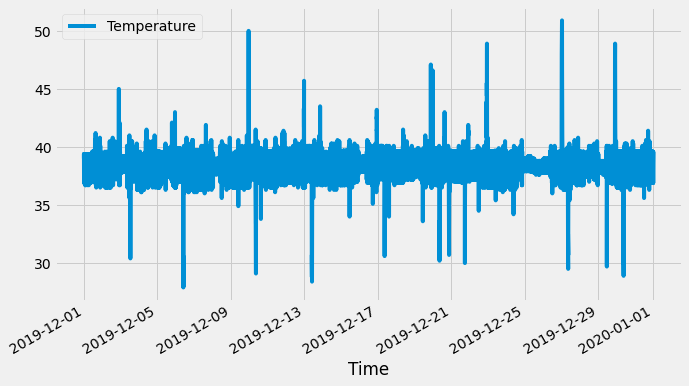

In [ ]:
novef.plot()

In [ ]:
class Raptors_Clean():
  months = ['nov', 'dec', 'jan', 'feb']
  df_names = [ ]

  def __init__(self,nov,dec,jan,feb):
    self.df_names = [nov,dec,jan,feb]


  def getOutlierBoundaryConditions(self,dataset):
      q75, q25 = np.percentile(dataset['Temperature'], [75, 25])
      IQR = q75 - q25

      lower_bound = q25 - (1.5 * IQR)
      upper_bound = q75 + (1.5 * IQR)

      filter1 = dataset['Temperature'] < lower_bound
      filter2 = dataset['Temperature'] > upper_bound

      print(q75)
      print(q25)
      return [filter1, filter2]

  def applyOutlierBoundaryConditions(self,dataset):
    onestConditions = self.getOutlierBoundaryConditions(dataset)
    # Replace values below Q1 - (1.5 * IQR) with Q1 i.e.25th Percentile
    dataset.loc[onestConditions[0]] = 38.7 
    # Replace values above Q3 + (1.5 * IQR) with  Q3 i.e.75th Percentile
    dataset.loc[onestConditions[1]] = 39.9
    dataset.loc[onestConditions[0] | onestConditions[1]]
    #lstConditions = self.getOutlierBoundaryConditions(data_imputed)
    #dataset.loc[lstConditions[0] | lstConditions[1]]
    return dataset
   


  def FillMissingValues(self):
      data_full = pd.DataFrame(columns = ['Time','Temperature'])
      for month, name in zip(self.months,self.df_names):
          print('Month: ',month)
          month = name.groupby(pd.Grouper(freq='1Min'))
          new_df = pd.DataFrame(columns = ['Time','Temperature'])
          for name, group in month:
              if (len(group.values.flatten()) == 0):
                  new_df = new_df.append({'Time':name,'Temperature':np.nan}, ignore_index=True)
              else:
                  new_df = new_df.append({'Time':name,'Temperature':group.values.flatten()[0]}, ignore_index=True)
                
    
          #data_full has the continuous data with nan values            
          data_full = pd.concat([data_full, new_df], sort=False, ignore_index=True)
      data_full.set_index('Time', drop=True, append=False, inplace=True, verify_integrity=False)
      print('Missing Values in the dataset',data_full.isnull().sum())
      imputer = KNNImputer(n_neighbors=15, weights="uniform")
      imputed_values = imputer.fit_transform(data_full)
      #convert the numeric columns after imputation to a dataframe  
      #data_imputed is complete datset imputed with KNN imputation values
      data_imputed = pd.DataFrame(imputed_values, columns=['Temperature'])
      data_imputed.index = data_full.index
      print('Missing Values in the dataset after imputation',data_imputed.isnull().sum())
      return data_imputed
    

In [ ]:
cleaner = Raptors_Clean(Nov,Dec,Jan,Feb)
Data = cleaner.FillMissingValues()

Month:  nov
Month:  dec
Month:  jan
Month:  feb
Missing Values in the dataset Temperature    30841
dtype: int64
Missing Values in the dataset after imputation Temperature    0
dtype: int64


In [ ]:
#Dataef = pd.concat([novef,decef,janef],axis=1)

In [ ]:
# onestConditions = cleaner.getOutlierBoundaryConditions(Data)
# Data.loc[onestConditions[0] | onestConditions[1]]

In [ ]:
# # Replace values below Q1 - (1.5 * IQR) with Q1 i.e.25th Percentile
# Data.loc[onestConditions[0]] = 38.7 
# # Replace values above Q3 + (1.5 * IQR) with  Q3 i.e.75th Percentile
# Data.loc[onestConditions[1]] = 39.9

In [ ]:
# onestConditions = cleaner.getOutlierBoundaryConditions(Data)
# Data.loc[onestConditions[0] | onestConditions[1]]

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


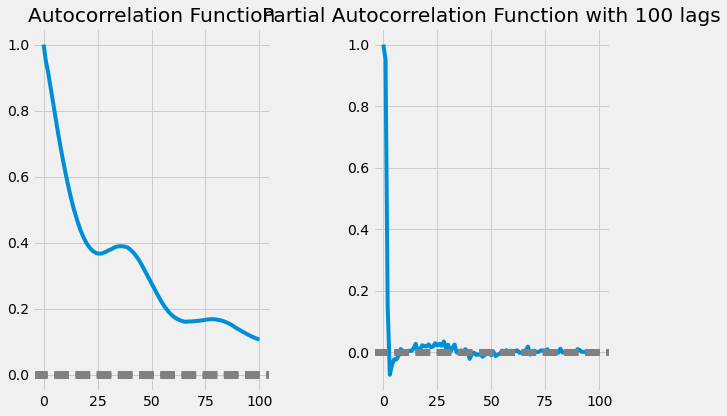

In [ ]:
# Plotting ACF & PCF
lag_acf = acf(Data['Temperature'], nlags=100)
lag_pacf = pacf(Data['Temperature'], nlags=100, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Data['Temperature'])), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(Data['Temperature'])), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Data['Temperature'])), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(Data['Temperature'])), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function with 100 lags')
           
plt.tight_layout()             

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


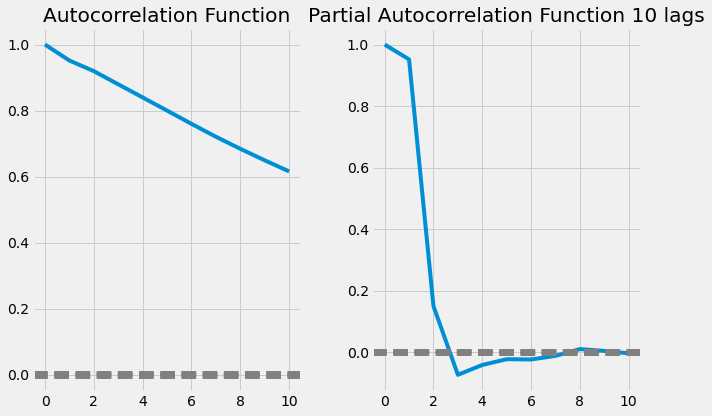

In [ ]:
# Plotting ACF & PCF
lag_acf = acf(Data['Temperature'], nlags=10)
lag_pacf = pacf(Data['Temperature'], nlags=10, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Data['Temperature'])), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(Data['Temperature'])), linestyle='--', color='gray')
plt.title('Autocorrelation Function')             
#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Data['Temperature'])), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(Data['Temperature'])), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function 10 lags')
            
plt.tight_layout()   
         

In [ ]:
class Raptorsforecast():
  '''
 'Enter Model (LR|KNN|DT|SVR|RF)'
  '''
  models = dict()
  dataset = pd.DataFrame()
  train_split = 0.70
  test_split = 0.30
  
  def __init__(self,data):
    self.dataset = data
    self.models['LR'] = LinearRegression()
    self.models['KNN'] = KNeighborsRegressor()
    self.models['DT'] = DecisionTreeRegressor()
    self.models['SVR'] = SVR()
    self.models['RF'] = RandomForestRegressor()
  
  def forecastArima(self,forecast_out):

    X = np.array(self.dataset['Temperature'])
    X = X[:-forecast_out]
    # Actual Values to be forecasted.
    y_actual = np.array(self.dataset['Temperature'])
    y_actual = y_actual[-forecast_out:]
    xlog = pd.DataFrame(np.log(X),columns=['Temperature'])
    x_log_shift = xlog - xlog.shift()
    x_log_shift.dropna(inplace=True)
    model = ARIMA(x_log_shift, order=(1,2,0))
    print('Plotting ARIMA model fit')
    results_ARIMA = model.fit(disp=-1)
    predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
    predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
    predictions_ARIMA_log = pd.Series(xlog['Temperature'].iloc[0], index=xlog.index)
    predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)  
    predictions_ARIMA = np.exp(predictions_ARIMA_log) - 27
    # There is bias in the model, with certain mean, Adjusting for bias is easy: if the residuals have mean  m, then simply add/sub m to all forecasts and the bias problem is solved. 
    #plt.plot()
    plt.plot(predictions_ARIMA)
    savepic('arima_fitted')
    train_fitted = predictions_ARIMA
    actual = X
    mse = ((train_fitted - actual) ** 2).mean()
    print('The Mean Squared Error is {}'.format(round(mse, 2)))
    print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))
    print('The r-2 value is',metrics.r2_score(actual,train_fitted))
    print('Mean Absolute Percentage Error',self.mean_absolute_percentage_error(actual,train_fitted))
    #results_ARIMA.plot_predict(133800,133927) 
    savepic('predict_'+str(forecast_out))
    x=results_ARIMA.forecast(steps=forecast_out)
    xexp = np.exp(x[1])
    mse = ((xexp - y_actual) ** 2).mean()
    print('The Mean Squared Error is {}'.format(round(mse, 2)))
    print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))
    print('The r-2 value is',metrics.r2_score(y_actual,xexp))
    print('Mean Absolute Percentage Error',self.mean_absolute_percentage_error(y_actual,xexp))


  def mean_absolute_percentage_error(self ,y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


  def forecastSarima(self,forecast_out):
    '''
    This method takes two input parameters (dataset,forecast_out)
    It prints all the metrics for forecasted and fitted values in the dataset of Seasonal Arima model with Optimal Parameters
    Also returns the np.array for next forecasted values and actual values.
    '''
    print('Forecasting for next '+str(forecast_out))
    #Remove the last 'forecast' rows
    X = np.array(self.dataset['Temperature'])
    X = X[:-forecast_out]
    # Actual Values to be forecasted.
    y_actual = np.array(self.dataset['Temperature'])
    y_actual = y_actual[-forecast_out:] 
    # Fitting the ARIMA model.
    mod = sm.tsa.statespace.SARIMAX(X,
                                order=(3, 0, 1),
                                seasonal_order=(3,1, 1,1),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
    results = mod.fit()
    #dataset.drop(['Pre_'+str(forecast_out)],inplace=True,axis=1)
    print(results.summary().tables[1])
    d = results.plot_diagnostics(figsize=(20, 8))
    savepic('sarima_fit')
    plt.show()
    x_fitted = results.fittedvalues
    #x_fitted_z = self.normalizeData(x_fitted)
    #X_z = self.normalizeData(X)
    # Metrics of RMSE & Mean Absolute Error
    print('Data fit metrics')
    print('Mean Absolute Error: ',metrics.mean_absolute_error(X,x_fitted))
    print('Mean Absolute Percentage Error',self.mean_absolute_percentage_error(X,x_fitted))
    print('Mean Squared Error: ',metrics.mean_squared_error(X,x_fitted))
    print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(X,x_fitted)))
    print('R Square Error (Percentage of Variance explained.)',metrics.r2_score(X,x_fitted))
    # Forecasting Using Forecast method
    y_forecasted = pd.DataFrame(results.forecast(steps = forecast_out), columns=['Temperature'])
    y_forecasted.reset_index(drop=True)
    #y_forecasted_z = self.normalizeData(y_forecasted['Temperature'])
    #y_actual_z = self.normalizeData(y_actual['Temperature'])
    print('Data Forecast metrics')
    print('Mean Absolute Error: ',metrics.mean_absolute_error(y_actual,y_forecasted['Temperature']))
    print('Forecast RMSE ',np.sqrt(metrics.mean_squared_error(y_actual,y_forecasted['Temperature'])))
    print('Forecast R Square ',metrics.r2_score(y_actual,y_forecasted['Temperature']))
    print('Mean Absolute Percentage Error',self.mean_absolute_percentage_error(y_actual,y_forecasted['Temperature']))
    return y_forecasted ,y_actual

    
  def iterateResults(self,model_type):
    outputs_iter = dict()
    actual_iter = dict()
    if model_type=='linear_regression':
      for i in [1,5,10,15,30,60,90,120,150,180]:
        print('Results of Linear Regression forecasting next '+str(i)+' values.')
        self.machineLearinigModels(i,'LR')
        print('#'*20)
        print('-'*20)
        print('#'*20)
    elif model_type == 'sarima':
      for i in [1,5,10,15,30,60,90,120,150,180]:
        print('Results of SARIMA forecasting next '+str(i)+' values.')
        outputf,inputf = self.forecastSarima(i)
        if ((i not in outputs_iter.keys()) and (i not in actual_iter.keys())):
          outputs_iter[i] = outputf
          actual_iter[i] = inputf
      
        print('#'*20)
        print('-'*20)
        print('#'*20)
      return outputs_iter,actual_iter
    elif model_type=='decision_tree':
      for i in [1,5,10,15,30,60,90,120,150,180]:
        print('Results of Decision Tree forecasting next '+str(i)+' values.')
        self.machineLearinigModels(i,'DT')
        print('#'*20)
        print('-'*20)
        print('#'*20)
    elif model_type=='random_forest':
      for i in [1,5,10,15,30,60,90,120,150,180]:
        print('Results of Random Forest forecasting next '+str(i)+' values.')
        self.machineLearinigModels(i,'RF')
        print('#'*20)
        print('-'*20)
        print('#'*20)
    elif model_type=='support_vector_regression':
      for i in [1,5,10,15,30,60,90,120,150,180]:
        print('Results of Support Vector Regression forecasting next '+str(i)+' values.')
        self.machineLearinigModels(i,'SVR')
        print('#'*20)
        print('-'*20)
        print('#'*20)
    elif model_type=='k_nearest_neighbors':
      for i in [1,5,10,15,30,60,90,120,150,180]:
        print('Results of K Nearest Neighbors forecasting next '+str(i)+' values.')
        self.machineLearinigModels(i,'KNN')
        print('#'*20)
        print('-'*20)
        print('#'*20)
    elif model_type=='arima':
      for i in [1,5,10,15,30,60,90,120,150,180]:
        print('Results of Arima forecasting next '+str(i)+'values.')
        self.forecastArima(i)
        print('#'*20)
        print('-'*20)
        print('#'*20)
    else:
      print("Enter valid Model Type !, ('sarima' or 'linear_regression' or 'decision_tree or k_nearest_neighbors','support_vector_regression','random_forest')")

  
  def create_dataset(self, data,forecast_out):
    dataX, dataY = [], []
    
    for i in range(len(data)-forecast_out):
        
        a = data[i:(i+forecast_out), 0]        
        dataX.append(a)
        dataY.append(data[i + forecast_out, 0])
    
    return np.array(dataX), np.array(dataY)
  
  def normalizeData(self,data):
    scaler = MinMaxScaler(feature_range = (0, 1))
    scaled = np.array(scaler.fit_transform(data)).reshape(-1,1)
    return scaled

  def minmaxscaler(self):
    scaler = MinMaxScaler(feature_range = (0, 1))
    scaled = scaler.fit_transform(self.dataset)
    train_size = int(len(scaled) * self.train_split)
    test_size = len(scaled - train_size)
    train, test = scaled[0:train_size, :], scaled[train_size:len(scaled), :]
    return train,test

  def machineLearinigModels(self,forecast_out,modelname):
    '''
    This method takes two input parameters (dataset,forecast_out)
    It prints all the metrics for forecasted and fitted values in the dataset of regression model with Optimal Parameters
    Also returns the np.array for next forecasted values.
    '''
    train,test = self.minmaxscaler()
    X_train, y_train = self.create_dataset(train, forecast_out)
    X_test, y_test = self.create_dataset(test, forecast_out)
    #X,y = self.createDataset(forecast_out)
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    # Create and train the Linear Regression  Model
    # Train the model
    print('Prediction Using ',modelname)
    dict_metrics = {}
    model = self.models[modelname]
    model = model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    mse_train = metrics.mean_squared_error(y_train, y_pred_train)
    mse_test  = metrics.mean_squared_error(y_test, y_pred_test)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    dict_metrics = {
        'Values Forecasted' : forecast_out,
        'Model Name' : modelname,
        'Train RMSE' : rmse_train,
        'Train R2 Score' : metrics.r2_score(y_train, y_pred_train),
        'Test RMSE' : rmse_test,
        'Test R2 Score' : metrics.r2_score(y_test, y_pred_test)
                      }
    for k,d in dict_metrics.items():
      print(str(k)+ ' : '+str(d))
  
  
  
  def correlationLag(self):
    for i in [1,5,10,15,30,60,90,120,150,180]:
      self.dataset['Pre_'+str(i)] = self.dataset['Temperature'].shift(-i)
    sns.heatmap(dataset.corr())
    plt.show()
    for i in [1,5,10,15,30,60,90,120,150,180]:
      self.dataset.drop(['Pre_'+str(i)],inplace=True,axis=1)

  

In [ ]:
# Below are example functions 
forecast = Raptorsforecast(Data) # Creating object 

In [ ]:
# forecast.machineLearinigModels(10,'LR') # Forecasting metrics for next 10 values using Linear Regression

In [ ]:
# forecast.machineLearinigModels(10,'DT') # Forecasting metrics for next 10 values using Decision tree

In [ ]:
forecast.iterateResults('decision_tree') # Forecasts values for all window sizes using Linear Regression

NameError: ignored

Forecasting for next 30
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0439      0.030     -1.447      0.148      -0.103       0.016
ar.L2          0.0352      0.002     14.173      0.000       0.030       0.040
ar.L3          0.0067      0.001      6.838      0.000       0.005       0.009
ma.L1         -0.0373      0.030     -1.229      0.219      -0.097       0.022
ar.S.L1       -0.0439      0.030     -1.447      0.148      -0.103       0.016
ar.S.L2        0.0352      0.002     14.173      0.000       0.030       0.040
ar.S.L3        0.0067      0.001      6.838      0.000       0.005       0.009
ma.S.L1       -0.0373      0.030     -1.229      0.219      -0.097       0.022
sigma2         0.7425      0.000   2670.330      0.000       0.742       0.743
Do you wanna download the output picture
no
Thanks for typing


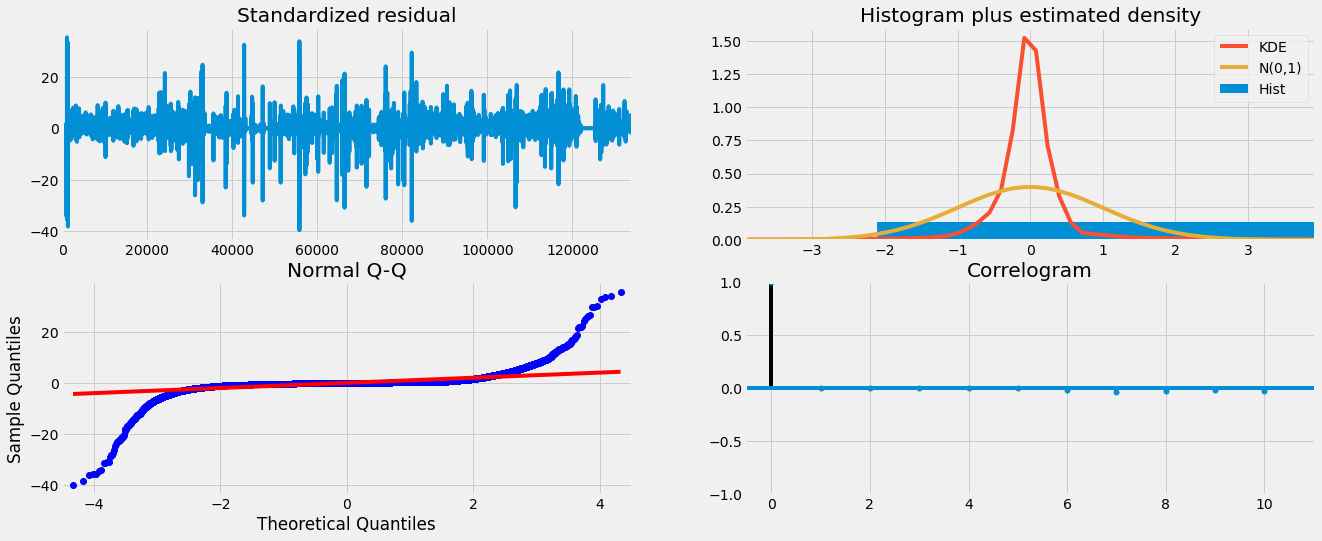

Data fit metrics
Mean Absolute Error:  0.29947277986556703
Mean Absolute Percentage Error 0.7263007672700049
Mean Squared Error:  0.7766348773017213
Root Mean Squared Error:  0.8812689018124498
R Square Error (Percentage of Variance explained.) 0.9028584324850115
Data Forecast metrics
Mean Absolute Error:  2.1545370320151345
Forecast RMSE  4.594343150240932
Forecast R Square  -0.18102361923818933
Mean Absolute Percentage Error 4.629948773708429


In [ ]:
forecasted, actual = forecast.forecastSarima(30)  # Returns the metrics for 30 values and Dataframe for actual 30 values and forecasted 30 values

In [ ]:
# forecasted, actual = forecast.iterateResults('sarima')  # Returns the metrics for various window sizes and dictonaries with actual and forecasted values for different window sizes.

Results of SARIMA forecasting next 1 values.
Forecasting for next 1
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0438      0.030     -1.447      0.148      -0.103       0.016
ar.L2          0.0353      0.002     14.277      0.000       0.030       0.040
ar.L3          0.0067      0.001      6.855      0.000       0.005       0.009
ma.L1         -0.0372      0.030     -1.229      0.219      -0.096       0.022
ar.S.L1       -0.0438      0.030     -1.447      0.148      -0.103       0.016
ar.S.L2        0.0353      0.002     14.277      0.000       0.030       0.040
ar.S.L3        0.0067      0.001      6.855      0.000       0.005       0.009
ma.S.L1       -0.0372      0.030     -1.229      0.219      -0.096       0.022
sigma2         0.7427      0.000   2669.682      0.000       0.742       0.743
Do you wanna download the output picture
no
Thanks for typing


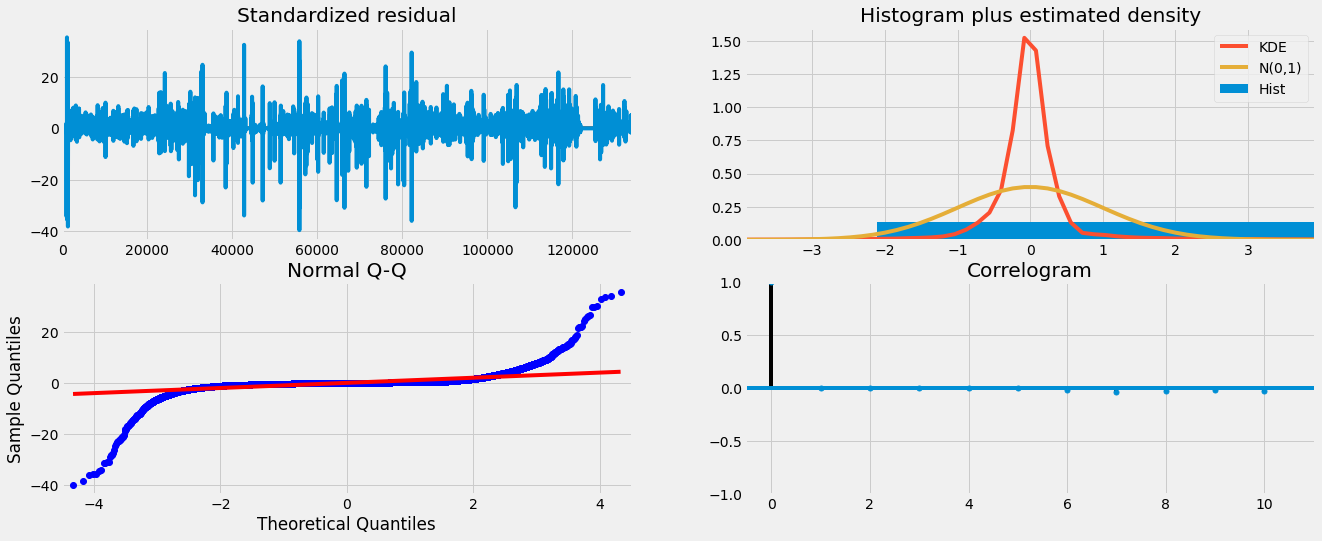

Data fit metrics
Mean Absolute Error:  0.29946707084129204
Mean Absolute Percentage Error 0.7262606822173491
Mean Squared Error:  0.7768396259744424
Root Mean Squared Error:  0.8813850611250694
R Square Error (Percentage of Variance explained.) 0.9028423138772643
Data Forecast metrics
Mean Absolute Error:  2.831813219345335
Forecast RMSE  2.831813219345335
Forecast R Square  nan
Mean Absolute Percentage Error 5.263593344508058
####################
--------------------
####################
Results of SARIMA forecasting next 5 values.
Forecasting for next 5


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0439      0.030     -1.447      0.148      -0.103       0.016
ar.L2          0.0352      0.002     14.176      0.000       0.030       0.040
ar.L3          0.0067      0.001      6.840      0.000       0.005       0.009
ma.L1         -0.0373      0.030     -1.229      0.219      -0.097       0.022
ar.S.L1       -0.0439      0.030     -1.447      0.148      -0.103       0.016
ar.S.L2        0.0352      0.002     14.176      0.000       0.030       0.040
ar.S.L3        0.0067      0.001      6.840      0.000       0.005       0.009
ma.S.L1       -0.0373      0.030     -1.229      0.219      -0.097       0.022
sigma2         0.7424      0.000   2670.783      0.000       0.742       0.743
Do you wanna download the output picture
no
Thanks for typing


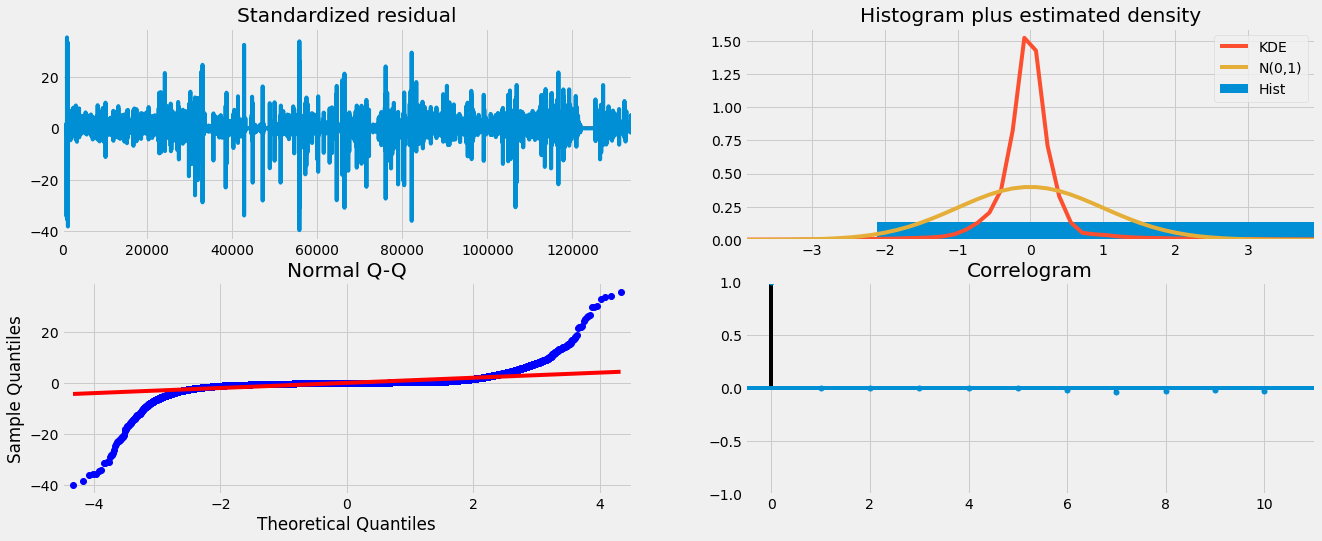

Data fit metrics
Mean Absolute Error:  0.29944555840773646
Mean Absolute Percentage Error 0.7262401866485537
Mean Squared Error:  0.7765021801722217
Root Mean Squared Error:  0.8811936110595796
R Square Error (Percentage of Variance explained.) 0.9028661308524012
Data Forecast metrics
Mean Absolute Error:  8.476957612528793
Forecast RMSE  9.683768126617796
Forecast R Square  -3.2906005275484445
Mean Absolute Percentage Error 16.947616060061478
####################
--------------------
####################
Results of SARIMA forecasting next 10 values.
Forecasting for next 10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0439      0.030     -1.447      0.148      -0.103       0.016
ar.L2          0.0352      0.002     14.177      0.000       0.030       0.040
ar.L3          0.0067      0.001      6.840      0.000       0.005       0.009
ma.L1         -0.0373   

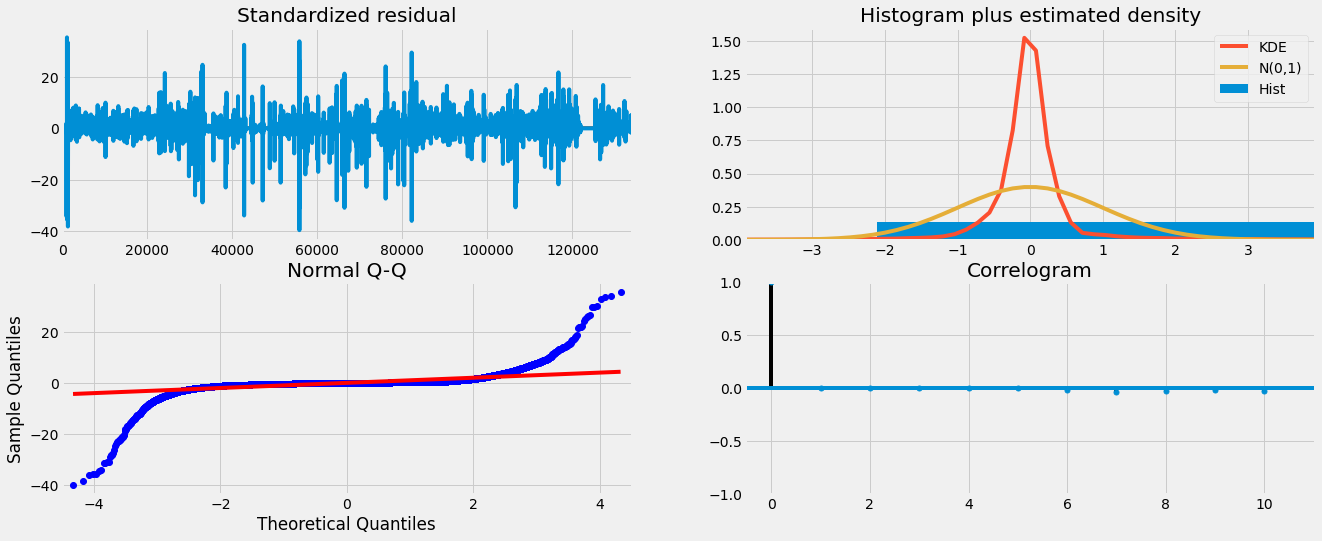

Data fit metrics
Mean Absolute Error:  0.29944261402190975
Mean Absolute Percentage Error 0.7262312215479744
Mean Squared Error:  0.7765220215660721
Root Mean Squared Error:  0.8812048692364745
R Square Error (Percentage of Variance explained.) 0.9028670205583234
Data Forecast metrics
Mean Absolute Error:  5.26413730653878
Forecast RMSE  7.582967837932331
Forecast R Square  -0.9302184695961453
Mean Absolute Percentage Error 10.846395150983856
####################
--------------------
####################
Results of SARIMA forecasting next 15 values.
Forecasting for next 15
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0439      0.030     -1.447      0.148      -0.103       0.016
ar.L2          0.0352      0.002     14.175      0.000       0.030       0.040
ar.L3          0.0067      0.001      6.840      0.000       0.005       0.009
ma.L1         -0.0373    

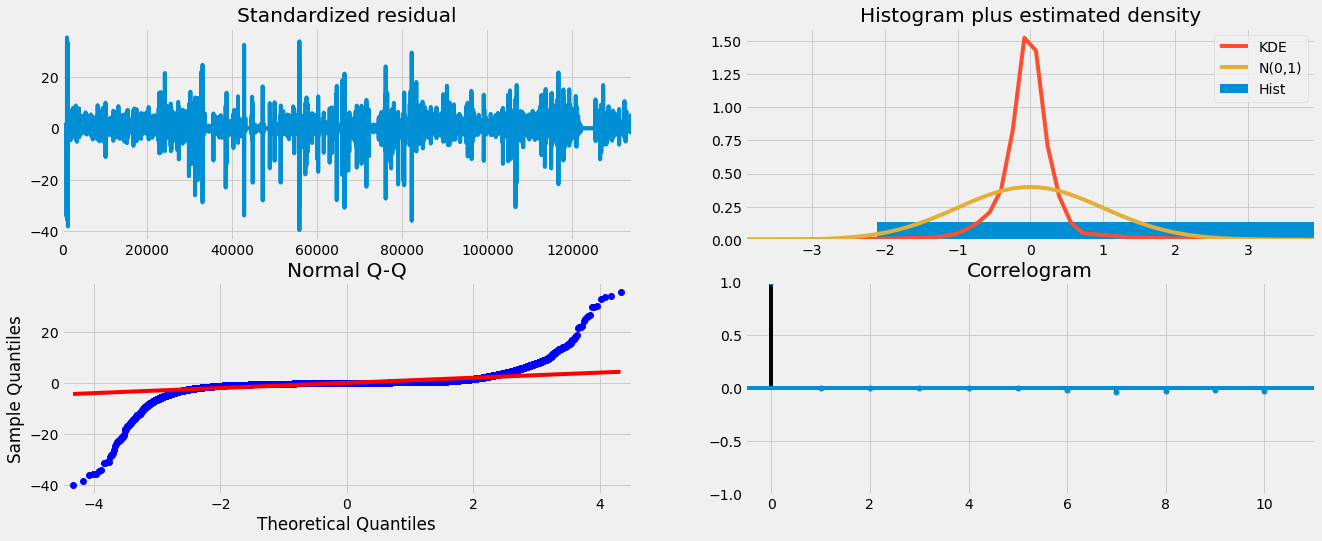

Data fit metrics
Mean Absolute Error:  0.29944801846150315
Mean Absolute Percentage Error 0.7262430300949486
Mean Squared Error:  0.7765494863962863
Root Mean Squared Error:  0.8812204527791478
R Square Error (Percentage of Variance explained.) 0.9028659132962903
Data Forecast metrics
Mean Absolute Error:  4.176542105601596
Forecast RMSE  6.622720015259462
Forecast R Square  -0.6597198407849083
Mean Absolute Percentage Error 8.845966878123722
####################
--------------------
####################
Results of SARIMA forecasting next 30 values.
Forecasting for next 30
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0439      0.030     -1.447      0.148      -0.103       0.016
ar.L2          0.0352      0.002     14.173      0.000       0.030       0.040
ar.L3          0.0067      0.001      6.838      0.000       0.005       0.009
ma.L1         -0.0373    

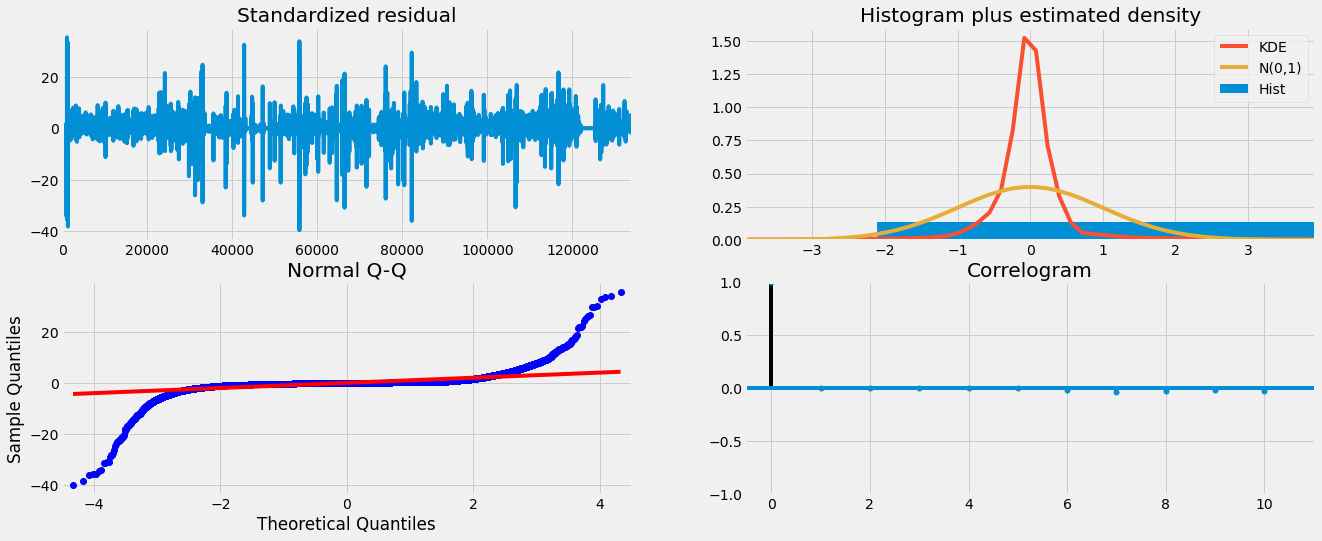

Data fit metrics
Mean Absolute Error:  0.29947277986556703
Mean Absolute Percentage Error 0.7263007672700049
Mean Squared Error:  0.7766348773017213
Root Mean Squared Error:  0.8812689018124498
R Square Error (Percentage of Variance explained.) 0.9028584324850115
Data Forecast metrics
Mean Absolute Error:  2.1545370320151345
Forecast RMSE  4.594343150240932
Forecast R Square  -0.18102361923818933
Mean Absolute Percentage Error 4.629948773708429
####################
--------------------
####################
Results of SARIMA forecasting next 60 values.
Forecasting for next 60
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0439      0.030     -1.447      0.148      -0.103       0.016
ar.L2          0.0352      0.002     14.169      0.000       0.030       0.040
ar.L3          0.0067      0.001      6.836      0.000       0.005       0.009
ma.L1         -0.0373  

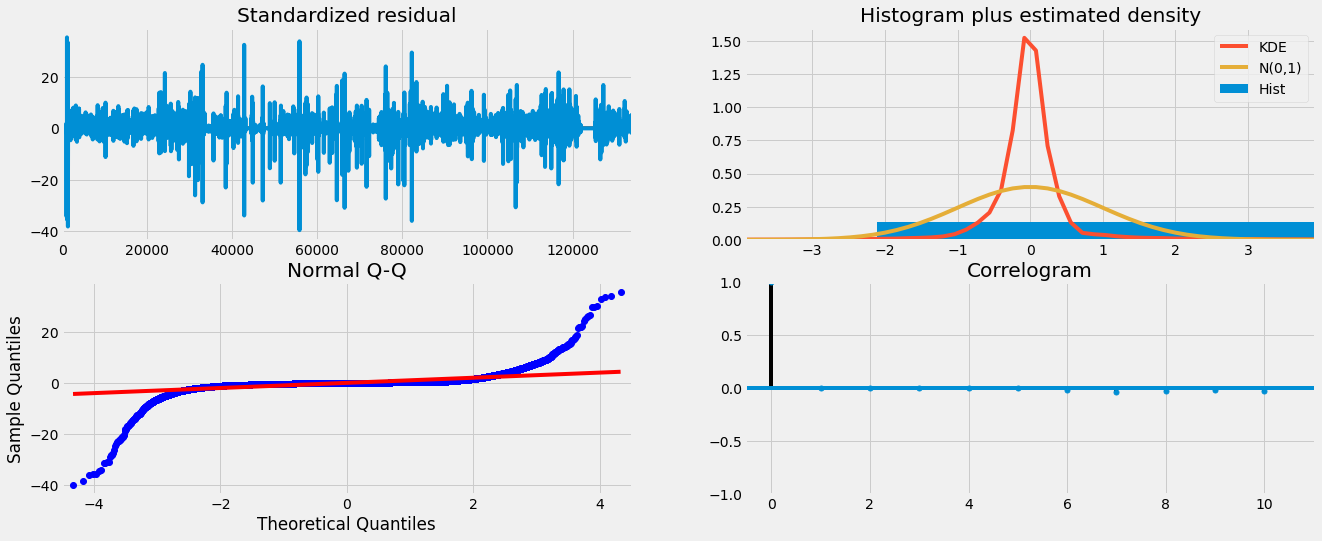

Data fit metrics
Mean Absolute Error:  0.2995023208268817
Mean Absolute Percentage Error 0.7263677203168619
Mean Squared Error:  0.7767985050558153
Root Mean Squared Error:  0.8813617333738828
R Square Error (Percentage of Variance explained.) 0.9028567616772476
Data Forecast metrics
Mean Absolute Error:  2.182899688766654
Forecast RMSE  3.182777319713205
Forecast R Square  -0.08474139655961999
Mean Absolute Percentage Error 5.353290094324971
####################
--------------------
####################
Results of SARIMA forecasting next 90 values.
Forecasting for next 90
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0439      0.030     -1.446      0.148      -0.104       0.016
ar.L2          0.0352      0.002     14.158      0.000       0.030       0.040
ar.L3          0.0067      0.001      6.827      0.000       0.005       0.009
ma.L1         -0.0373    

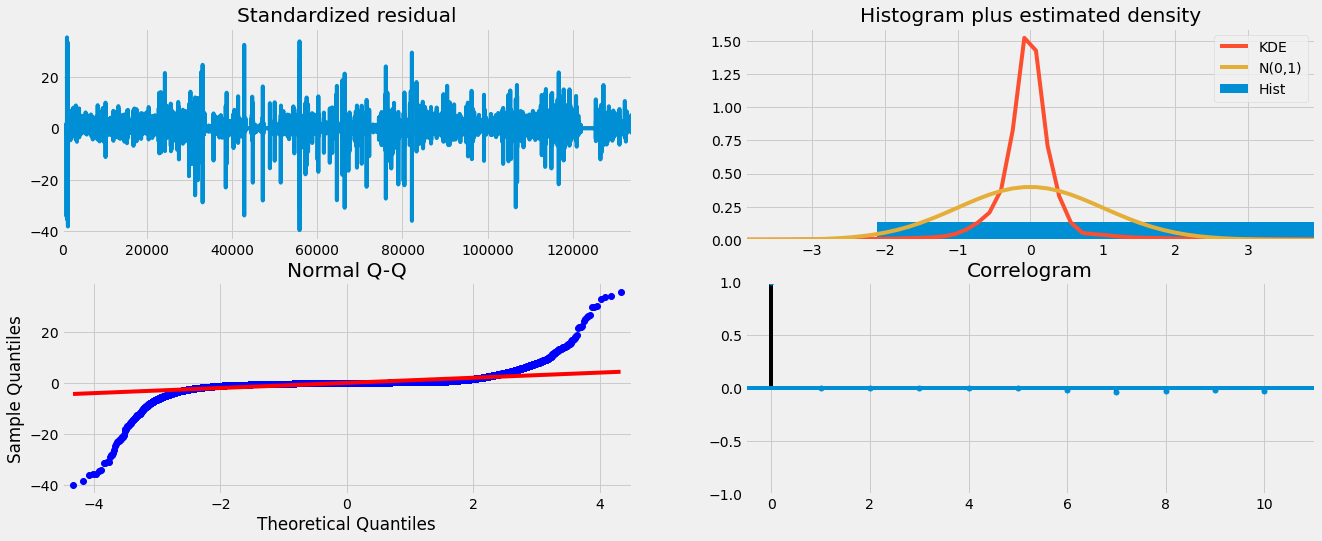

Data fit metrics
Mean Absolute Error:  0.2995309934931788
Mean Absolute Percentage Error 0.7264299483813752
Mean Squared Error:  0.7769567591638618
Root Mean Squared Error:  0.8814515069837148
R Square Error (Percentage of Variance explained.) 0.9028489025922739
Data Forecast metrics
Mean Absolute Error:  1.3890937423060556
Forecast RMSE  2.6484982037924305
Forecast R Square  -0.019463430623612554
Mean Absolute Percentage Error 3.3177131039870273
####################
--------------------
####################
Results of SARIMA forecasting next 120 values.
Forecasting for next 120
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0439      0.030     -1.450      0.147      -0.103       0.015
ar.L2          0.0352      0.002     14.225      0.000       0.030       0.040
ar.L3          0.0067      0.001      6.868      0.000       0.005       0.009
ma.L1         -0.03

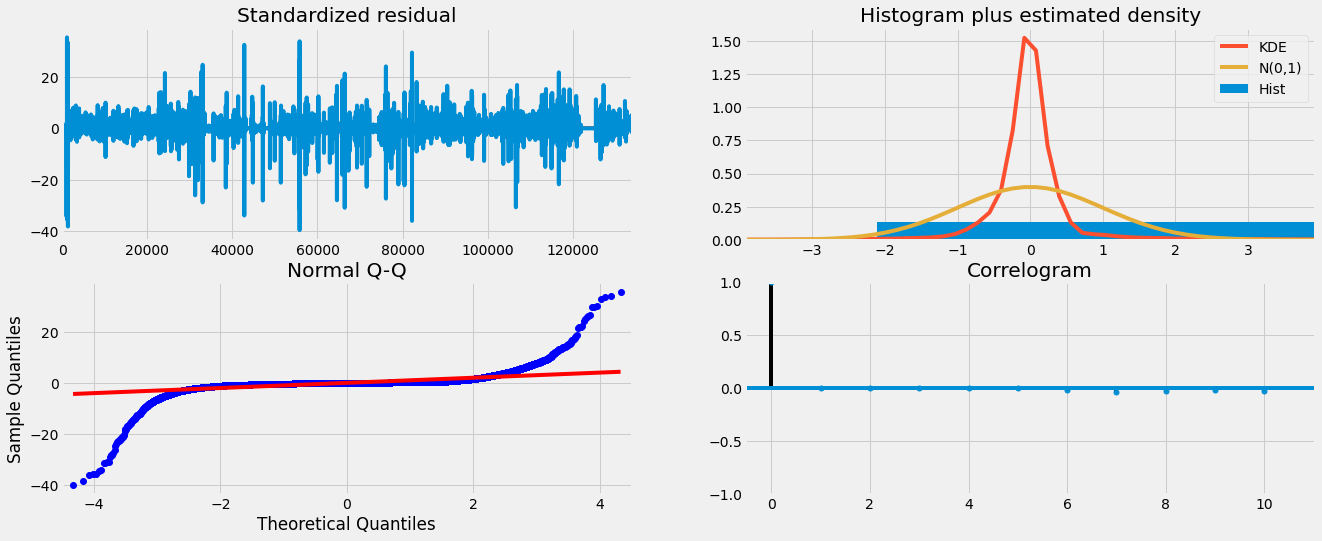

Data fit metrics
Mean Absolute Error:  0.29945515814666085
Mean Absolute Percentage Error 0.7262476684041912
Mean Squared Error:  0.7768966766138281
Root Mean Squared Error:  0.8814174247278234
R Square Error (Percentage of Variance explained.) 0.9028707650984849
Data Forecast metrics
Mean Absolute Error:  2.099324890313357
Forecast RMSE  2.748830890219921
Forecast R Square  -0.25951795689098955
Mean Absolute Percentage Error 5.309613475488955
####################
--------------------
####################
Results of SARIMA forecasting next 150 values.
Forecasting for next 150
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0439      0.030     -1.454      0.146      -0.103       0.015
ar.L2          0.0352      0.002     14.246      0.000       0.030       0.040
ar.L3          0.0067      0.001      6.905      0.000       0.005       0.009
ma.L1         -0.0373 

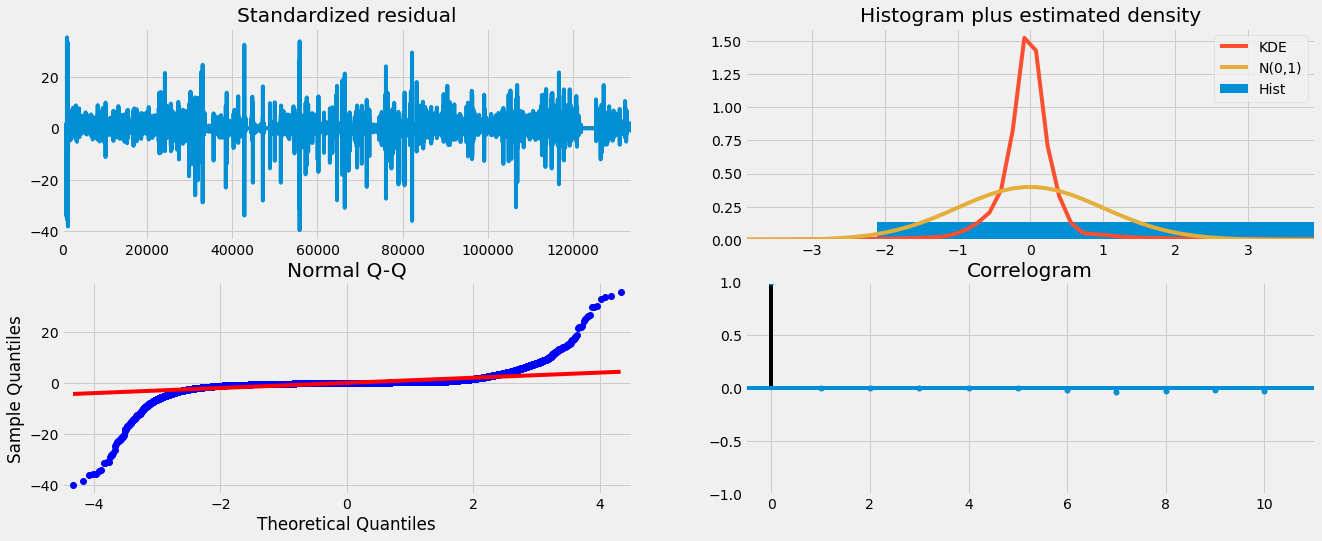

Data fit metrics
Mean Absolute Error:  0.2993669111681354
Mean Absolute Percentage Error 0.7260475016854397
Mean Squared Error:  0.7767752941959184
Root Mean Squared Error:  0.8813485656628247
R Square Error (Percentage of Variance explained.) 0.9028921640135679
Data Forecast metrics
Mean Absolute Error:  1.7184760373185775
Forecast RMSE  2.4920166533357433
Forecast R Square  -0.0009670917845894245
Mean Absolute Percentage Error 4.221756904594521
####################
--------------------
####################
Results of SARIMA forecasting next 180 values.
Forecasting for next 180
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0439      0.030     -1.455      0.146      -0.103       0.015
ar.L2          0.0352      0.002     14.255      0.000       0.030       0.040
ar.L3          0.0067      0.001      6.912      0.000       0.005       0.009
ma.L1         -0.03

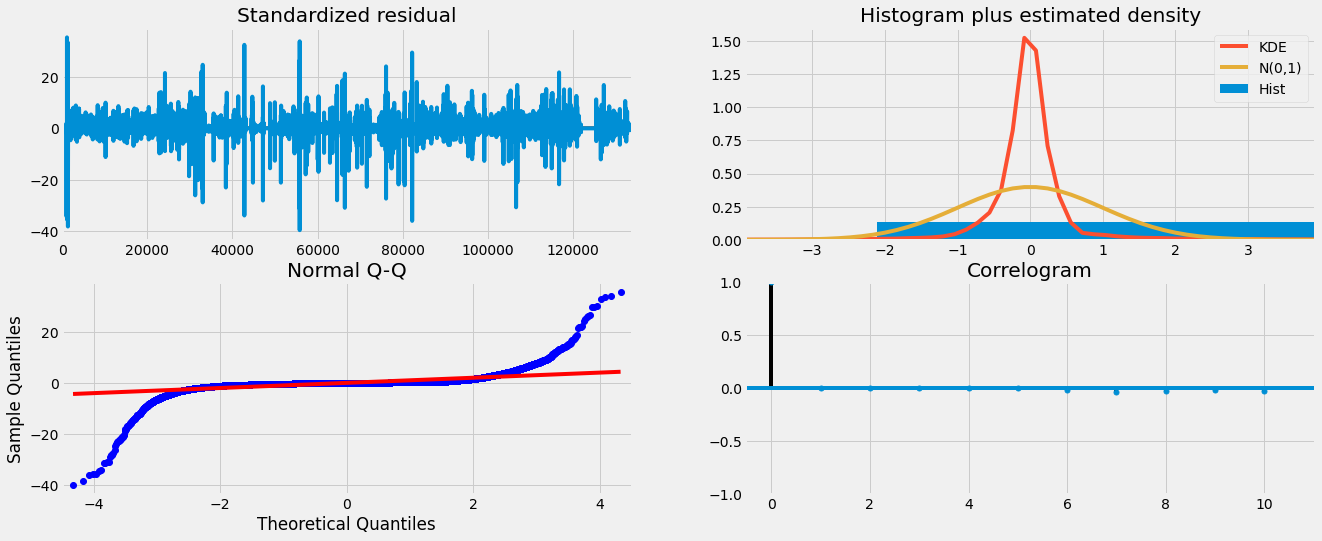

Data fit metrics
Mean Absolute Error:  0.29936401800062046
Mean Absolute Percentage Error 0.7260300330784596
Mean Squared Error:  0.7768992287100783
Root Mean Squared Error:  0.8814188724494605
R Square Error (Percentage of Variance explained.) 0.9028921142120475
Data Forecast metrics
Mean Absolute Error:  1.5351452139182886
Forecast RMSE  2.3994058434141734
Forecast R Square  -0.0511960934739053
Mean Absolute Percentage Error 3.720829422602
####################
--------------------
####################


In [ ]:
forecast, actuals = forecast.iterateResults('sarima')

Results of Arima forecasting next 1values.
Plotting ARIMA model fit


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Do you wanna download the output picture
no
Thanks for typing
The Mean Squared Error is 10.6
The Root Mean Squared Error is 3.26
The r-2 value is -0.3253775998423498
Mean Absolute Percentage Error 3.966213395867853
Do you wanna download the output picture
no
Thanks for typing
The Mean Squared Error is 2783.99
The Root Mean Squared Error is 52.76
The r-2 value is nan
Mean Absolute Percentage Error 98.07345178742695
####################
--------------------
####################
Results of Arima forecasting next 5values.
Plotting ARIMA model fit


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Do you wanna download the output picture
no
Thanks for typing
The Mean Squared Error is 10.12
The Root Mean Squared Error is 3.18
The r-2 value is -0.2661971258646483
Mean Absolute Percentage Error 3.8325162886160475
Do you wanna download the output picture
no
Thanks for typing
The Mean Squared Error is 2192.51
The Root Mean Squared Error is 46.82
The r-2 value is -99.31629249839419
Mean Absolute Percentage Error 97.67279664339667
####################
--------------------
####################
Results of Arima forecasting next 10values.
Plotting ARIMA model fit


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Do you wanna download the output picture
no
Thanks for typing
The Mean Squared Error is 10.35
The Root Mean Squared Error is 3.22
The r-2 value is -0.29463454324056837
Mean Absolute Percentage Error 4.318621837988804
Do you wanna download the output picture
no
Thanks for typing
The Mean Squared Error is 1802.73
The Root Mean Squared Error is 42.46
The r-2 value is -59.51448557113427
Mean Absolute Percentage Error 97.13267751025958
####################
--------------------
####################
Results of Arima forecasting next 15values.
Plotting ARIMA model fit


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Do you wanna download the output picture
no
Thanks for typing
The Mean Squared Error is 10.9
The Root Mean Squared Error is 3.3
The r-2 value is -0.3632524674296147
Mean Absolute Percentage Error 4.8942884335450385
Do you wanna download the output picture
no
Thanks for typing
The Mean Squared Error is 1631.81
The Root Mean Squared Error is 40.4
The r-2 value is -60.74904722259125
Mean Absolute Percentage Error 96.53962020071653
####################
--------------------
####################
Results of Arima forecasting next 30values.
Plotting ARIMA model fit


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Do you wanna download the output picture
no
Thanks for typing
The Mean Squared Error is 10.4
The Root Mean Squared Error is 3.22
The r-2 value is -0.30037926984636587
Mean Absolute Percentage Error 4.376693282579529
Do you wanna download the output picture
no
Thanks for typing
The Mean Squared Error is 1336.93
The Root Mean Squared Error is 36.56
The r-2 value is -73.80339522337542
Mean Absolute Percentage Error 92.85791795184178
####################
--------------------
####################
Results of Arima forecasting next 60values.
Plotting ARIMA model fit


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Do you wanna download the output picture
no
Thanks for typing
The Mean Squared Error is 10.75
The Root Mean Squared Error is 3.28
The r-2 value is -0.343850621957281
Mean Absolute Percentage Error 4.750252144006511
Do you wanna download the output picture
no
Thanks for typing
The Mean Squared Error is 4175.06
The Root Mean Squared Error is 64.61
The r-2 value is -446.0710952831792
Mean Absolute Percentage Error 110.17566672553623
####################
--------------------
####################
Results of Arima forecasting next 90values.
Plotting ARIMA model fit


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Do you wanna download the output picture
no
Thanks for typing
The Mean Squared Error is 10.22
The Root Mean Squared Error is 3.2
The r-2 value is -0.27853458380124607
Mean Absolute Percentage Error 3.811031751068947
Do you wanna download the output picture
no
Thanks for typing
The Mean Squared Error is 39391076.6
The Root Mean Squared Error is 6276.23
The r-2 value is -5724928.422261363
Mean Absolute Percentage Error 5352.408835138756
####################
--------------------
####################
Results of Arima forecasting next 120values.
Plotting ARIMA model fit


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Do you wanna download the output picture
no
Thanks for typing
The Mean Squared Error is 10.89
The Root Mean Squared Error is 3.3
The r-2 value is -0.3611481373333221
Mean Absolute Percentage Error 4.880463810140759
Do you wanna download the output picture
no
Thanks for typing
The Mean Squared Error is 1680636551371.24
The Root Mean Squared Error is 1296393.67
The r-2 value is -280144514492.5491
Mean Absolute Percentage Error 869181.8056689523
####################
--------------------
####################
Results of Arima forecasting next 150values.
Plotting ARIMA model fit


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Do you wanna download the output picture
no
Thanks for typing
The Mean Squared Error is 10.97
The Root Mean Squared Error is 3.31
The r-2 value is -0.37150299826609867
Mean Absolute Percentage Error 4.9540746206114
Do you wanna download the output picture
no
Thanks for typing
The Mean Squared Error is 3.4267741128128864e+17
The Root Mean Squared Error is 585386548.6
The r-2 value is -5.5233605865165256e+16
Mean Absolute Percentage Error 326316011.16691965
####################
--------------------
####################
Results of Arima forecasting next 180values.
Plotting ARIMA model fit


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Do you wanna download the output picture
no
Thanks for typing
The Mean Squared Error is 10.86
The Root Mean Squared Error is 3.3
The r-2 value is -0.3571498620995881
Mean Absolute Percentage Error 4.851661315601428
Do you wanna download the output picture
no
Thanks for typing
The Mean Squared Error is 2.7868738908395673e+23
The Root Mean Squared Error is 527908504462.62
The r-2 value is -5.088545131713906e+22
Mean Absolute Percentage Error 253350217459.72205
####################
--------------------
####################


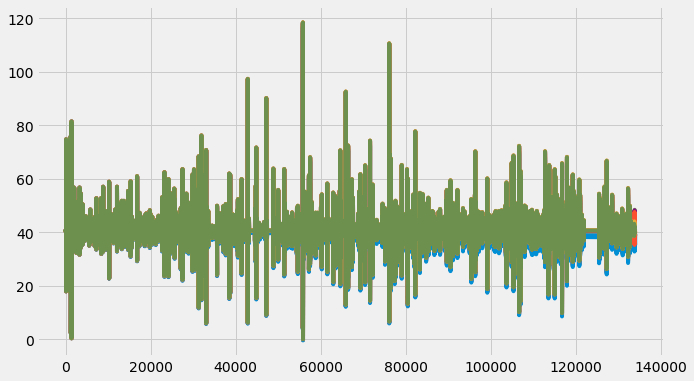

In [ ]:
forecast.iterateResults('arima')